# Introduction to Machine Learning

## Data Types

We can split the data types into three main categories:

- **Numerical:** data are numbers, and can be split into two numerical categories:
    - *Discrete Data*: numbers that are limited to integers. ***Example***: The number of cars passing by.
    - *Continuous Data*: numbers that are of infinite value. ***Example***: The price of an item, or the size of an item.
- **Categorical:** data are values that cannot be measured up against each other. ***Example***: a color value, or any yes/no values.
- **Ordinal:** data are like categorical data, but can be measured up against each other. ***Example***: school grades where A is better than B and so on.

## Mean, Median, and Mode

- **Mean** - The average value
- **Median** - The mid point value
- **Mode** - The most common value

In [8]:
import numpy as np
import scipy
from scipy import stats

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
print(np.mean(speed)) 
print(np.median(speed)) 
print(stats.mode(speed))

#if there is NaN in speed, np.median will return NaN. To calculate median (while ignoring NaNs): np.median(speed[~np.isnan(speed)])

89.76923076923077
87.0
ModeResult(mode=array([86]), count=array([3]))


In [9]:
speed = [99,86,87,np.nan,88,111,np.nan,86,103,87,np.nan,94,78,77,85,86,np.nan]
speed_0 = ~np.isnan(speed)
speed_1 = list(map(lambda x: x if x not in [np.nan] else 1000, speed))
speed_1

[99, 86, 87, 1000, 88, 111, 1000, 86, 103, 87, 1000, 94, 78, 77, 85, 86, 1000]

In [10]:
np.nan == np.nan, np.nan in [np.nan]

(False, True)

In [13]:
replacements = {np.nan: 1000,}

speed_2 = [replacements.get(x, x) for x in speed]

print(speed_2)

[99, 86, 87, 1000, 88, 111, 1000, 86, 103, 87, 1000, 94, 78, 77, 85, 86, 1000]


## Standard Deviation

In [2]:
np.std(speed)

9.258292301032677

## Variance

*standar deviation = square root of the variance*

In [3]:
np.var(speed)

85.71597633136093

## Percentiles

Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than.

In [4]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

In [5]:
np.percentile(ages, 75)

43.0

**Meaning:** 75% of the people are 43 or younger

## Data Distribution

Create an array containing 250 random floats between 0 and 5:

In [6]:
x1 = np.random.uniform(0.0, 5.0, 250)
x2 = np.random.normal(0.0, 5.0, 250)

## Histogram

In [7]:
import matplotlib.pyplot as plt

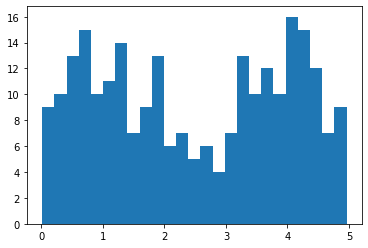

In [8]:
plt.hist(x1, 25)
plt.show()

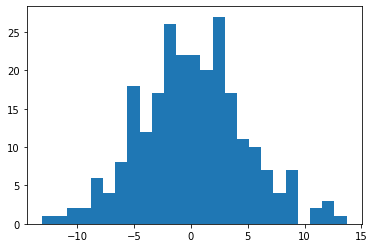

In [9]:
plt.hist(x2, 25)
plt.show()

### Big Data Distribution

In [10]:
x3 = np.random.uniform(0.0, 5.0, 100000)
x4 = np.random.normal(0.0, 5.0, 100000)

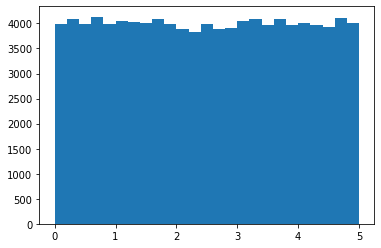

In [11]:
plt.hist(x3, 25)
plt.show()

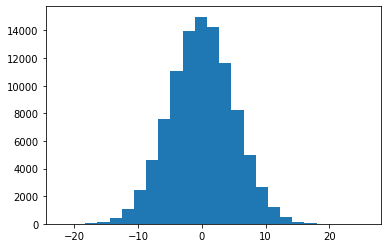

In [12]:
plt.hist(x4, 25)
plt.show()

## Scatter Plot

In [13]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

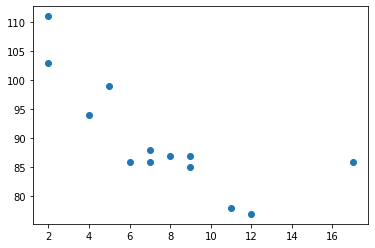

In [14]:
plt.scatter(x, y)

### Random Data Distributions

In [15]:
x1 = np.random.normal(5.0, 1.0, 1000)
y1 = np.random.normal(10.0, 2.0, 1000)

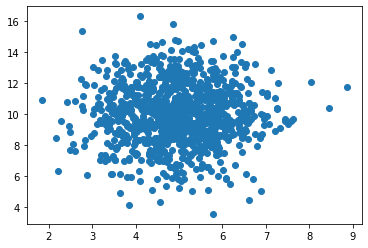

In [16]:
plt.scatter(x1, y1)

In [17]:
x2 = np.random.uniform(5.0, 1.0, 1000)
y2 = np.random.uniform(10.0, 2.0, 1000)

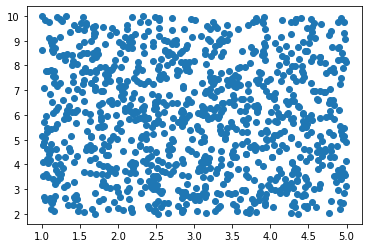

In [18]:
plt.scatter(x2, y2)

## Linear Regression

In [19]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

In [20]:
slope, intercept, r, p, stderr = stats.linregress(x, y)
slope, intercept, r, p, stderr

(-1.7512877115526118,
 103.10596026490066,
 -0.758591524376155,
 0.0026468739224561064,
 0.453536157607742)

In [21]:
def func(x):
    return intercept + slope * x

model = list(map(func, x))
model = [*map(func, x)]
model = [func(x) for x in x]

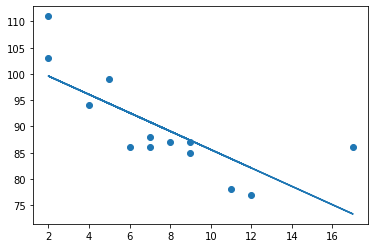

In [22]:
plt.plot(x, model)
plt.scatter(x, y)
plt.show()

### Another Method:

In [23]:
mymodel = np.poly1d(np.polyfit(x, y, 1))

In [24]:
myline = np.linspace(1, 17, 100)

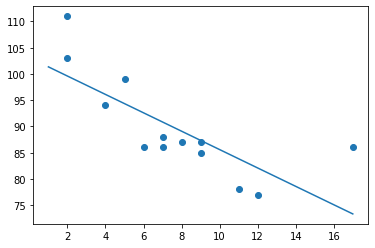

In [25]:
plt.plot(myline, mymodel(myline))
plt.scatter(x, y)
plt.show()

### Another Method (`sklearn`)

In [26]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1), np.array(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
regr.predict(np.array(10).reshape(-1, 1))

array([85.59308315])

In [28]:
print(regr.intercept_)

103.10596026490066


In [29]:
print(regr.coef_)

[-1.75128771]


## R for Relationship

It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

This relationship - the coefficient of correlation - is called r.

The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

In [30]:
print(r)

-0.758591524376155


**Note:** The result -0.76 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.

## Predict Future Values

In [31]:
speed = func(10)
speed

85.59308314937454

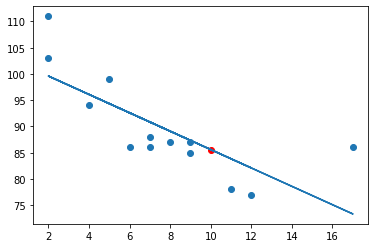

In [32]:
plt.scatter(10, speed, color='red')
plt.plot(x, model)
plt.scatter(x, y)
plt.show()

### Bad Fit?

In [33]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

In [34]:
slope, intercept, r, p, stderr = stats.linregress(x, y)

In [35]:
def func(x):
    return intercept + slope * x

model = list(map(func, x)) # convert map to list
model = [func(x) for x in x]

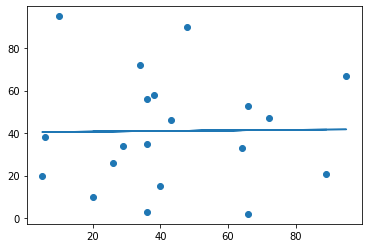

In [36]:
plt.plot(x, model)
plt.scatter(x, y)
plt.show()

Let's look at the `r` value:

In [37]:
print(r)

0.01331814154297491


## Polynomial Regression

In [38]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

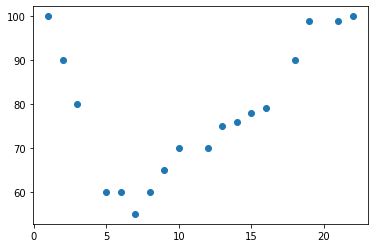

In [39]:
plt.scatter(x, y)
plt.show()

In [40]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

In [41]:
myline = np.linspace(1, 22, 100)

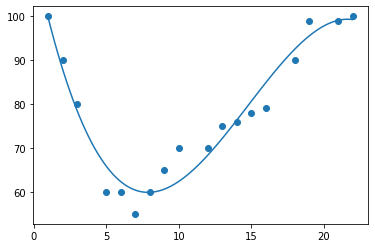

In [42]:
plt.plot(myline, mymodel(myline))
plt.scatter(x, y)
plt.show()

## R-Squared

It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

In [43]:
from sklearn.metrics import r2_score

In [44]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

In [45]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

In [46]:
print(r2_score(y, mymodel(x)))

0.9432150416451026


## Predict Future Values

In [47]:
speed = mymodel(17)
speed

88.87331269697978

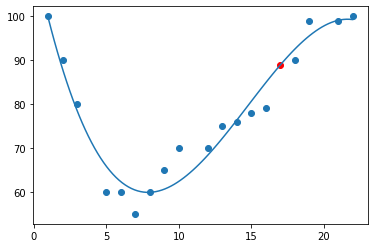

In [48]:
plt.scatter(17, speed, color='red')
plt.plot(myline, mymodel(myline))
plt.scatter(x, y)
plt.show()

### Bad Fit?

In [49]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

In [50]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

In [51]:
myline = np.linspace(2, 95, 100)

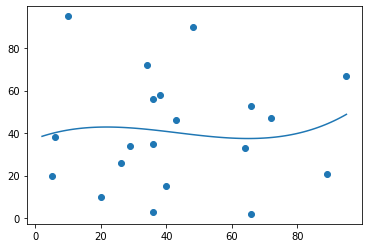

In [52]:
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [53]:
print(r2_score(y, mymodel(x)))

0.009952707566680652


## Multiple Regression

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on **two** or **more** variables.

In [54]:
import pandas as pd
df = pd.read_csv("cars.csv")

In [55]:
df.head(5)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [56]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [57]:
X = df[['Weight', 'Volume']]
X.head(5)

,Weight,Volume
0,790,1000
1,1160,1200
2,929,1000
3,865,900
4,1140,1500


In [58]:
y = df['CO2']
y.head(5)

0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64

In [59]:
from sklearn import linear_model

In [60]:
regr = linear_model.LinearRegression()

In [61]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
predictedCO2 = regr.predict([[2300, 1300]])
predictedCO2

array([107.2087328])

### Coefficient

In [63]:
print(regr.coef_)

[0.00755095 0.00780526]


### Data Train and Prediction

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
regr = linear_model.LinearRegression()

In [66]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred = regr.predict(X_test)

In [68]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
31,117,108.549002
20,94,104.318040
16,99,102.721611
30,115,108.283675
22,99,106.534163
15,97,102.466474
10,99,96.102551
2,95,94.968269


## Scale

### Scale Features

When your data has different values, and even different measurement units, it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?

The answer to this problem is scaling. We can scale data into new values that are easier to compare.

Formula: $$\frac{\text{original value} - \text{mean}}{\text{standard deviation}}$$

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scale = StandardScaler()

In [71]:
df = pd.read_csv("cars.csv")
X = df[['Weight', 'Volume']] 
scaledX = scale.fit_transform(X)
scaledX

array([[-2.10389253, -1.59336644],
       [-0.55407235, -1.07190106],
       [-1.52166278, -1.59336644],
       [-1.78973979, -1.85409913],
       [-0.63784641, -0.28970299],
       [-1.52166278, -1.59336644],
       [-0.76769621, -0.55043568],
       [ 0.3046118 , -0.28970299],
       [-0.7551301 , -0.28970299],
       [-0.59595938, -0.0289703 ],
       [-1.30803892, -1.33263375],
       [-1.26615189, -0.81116837],
       [-0.7551301 , -1.59336644],
       [-0.16871166, -0.0289703 ],
       [ 0.14125238, -0.0289703 ],
       [ 0.15800719, -0.0289703 ],
       [ 0.3046118 , -0.0289703 ],
       [-0.05142797,  1.53542584],
       [-0.72580918, -0.0289703 ],
       [ 0.14962979,  1.01396046],
       [ 1.2219378 , -0.0289703 ],
       [ 0.5685001 ,  1.01396046],
       [ 0.3046118 ,  1.27469315],
       [ 0.51404696, -0.0289703 ],
       [ 0.51404696,  1.01396046],
       [ 0.72348212, -0.28970299],
       [ 0.8281997 ,  1.01396046],
       [ 1.81254495,  1.01396046],
       [ 0.96642691,

### Prediction

When the data set is scaled, you will have to use the scale when you predict values:

In [72]:
y = df['CO2']

In [73]:
regr = linear_model.LinearRegression()

In [74]:
regr.fit(scaledX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
scaled = scale.transform([[2300, 1.3]])

In [76]:
predictedCO2 = regr.predict([scaled[0]])
predictedCO2

array([97.07204485])

## Train/Test

First, to generate *same* random numbers, we use `np.random.seed(number)`, which needs to be called every time!

Example:

In [77]:
np.random.seed(0)
rnd = np.random.normal(10) 
print(rnd)
np.random.seed(0)
print(np.random.normal(10))
np.random.seed(0)
print(np.random.normal(10))

11.764052345967665
11.764052345967665
11.764052345967665


Generate random numbers:

In [78]:
np.random.seed(2)
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

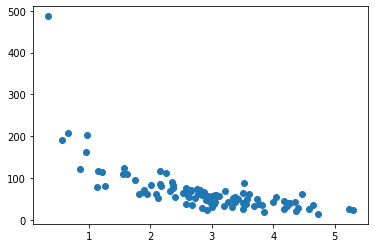

In [79]:
plt.scatter(x, y)
plt.show()

### Split Into Train/Test

The training set should be a random selection of **80%** of the original data.

The testing set should be the remaining **20%**.

In [80]:
x_train = x[:80]
y_train = y[:80]
x_test = x[80:]
y_test = y[80:]

### Display the Training & Testing Set

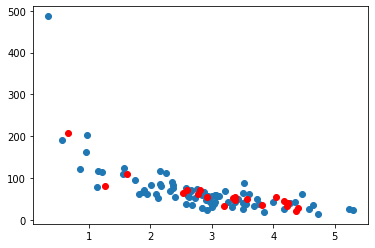

In [81]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='red')

### Fit the Data Set

In [82]:
mymodel = np.poly1d(np.polyfit(x_train, y_train, 4))

In [83]:
myline = np.linspace(0, 6, 100)

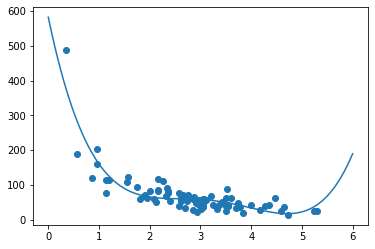

In [84]:
plt.scatter(x_train, y_train)
plt.plot(myline, mymodel(myline))
plt.show()

### R2 (or R-squared)

In [85]:
r2 = r2_score(y_train, mymodel(x_train))
r2

0.7988645544629795

### Bring in the Testing Set

In [86]:
r2 = r2_score(y_test, mymodel(x_test))
r2

0.8086921460343666

### Predict Values

In [87]:
print(mymodel(5))

22.879625918120155


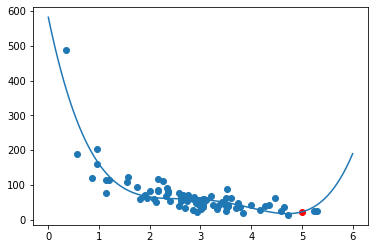

In [88]:
plt.scatter(5, mymodel(5), color='red')
plt.scatter(x_train, y_train)
plt.plot(myline, mymodel(myline))
plt.show()

In [89]:
y_pred = [*map(mymodel, x_test)] # to convert map to list
# y_pred = list(map(mymodel, x_test))
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,72.378731,59.838956
1,55.462642,59.150219
2,34.468267,40.088454
3,40.152137,26.027590
4,70.558835,60.577817
5,108.466050,81.513699
6,21.035144,22.673472
7,32.357276,26.959744
8,64.761891,60.724262
9,52.191774,53.221850


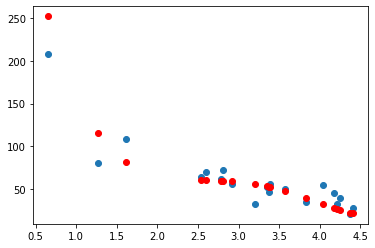

In [90]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, np.array(y_pred), color='red')

## Decision Tree

![decision-tree](./images/decision-tree.png)


In the example, a person will try to decide if he/she should go to a comedy show or not.

In [91]:
df = pd.read_csv("shows.csv")
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


To make a decision tree, all data **has to** be numerical.

We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.

Pandas has a map() method that takes a dictionary with information on how to convert the values.

`{'UK': 0, 'USA': 1, 'N': 2}`

Means convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.

In [92]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

In [93]:
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

In [94]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


In [95]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

In [96]:
X = df[features]
y = df['Go']

### Create a Decision Tree, save it as an image, and show the image:

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

In [98]:
dtree = DecisionTreeClassifier()

In [99]:
dtree = dtree.fit(X, y)

In [100]:
# pip install graphviz
# conda install graphviz
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)

In [101]:
graph = pydotplus.graph_from_dot_data(data)

In [108]:
graph.write_png('./images/mydecisiontree.png')

True

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

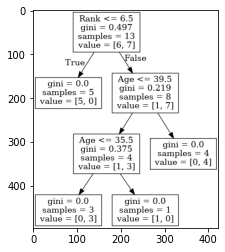

In [110]:
img=pltimg.imread('./images/mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

### Predict Values

**Example:** Should I go see a show starring a 40 years old American comedian, with 10 years of experience, and a comedy ranking of 7?

In [111]:
print(dtree.predict([[40, 10, 7, 1]]))

[1]


What would the answer be if the comedy rank was 6?

In [113]:
print(dtree.predict([[40, 10, 6, 1]]))

[0]
